=== HEATMAP KORELASI SPEARMAN - AGGREGATED DATASET ENCODED ===
✓ Dataset tanpa outliers ditemukan
Shape dataset: (1051, 20)

Kolom untuk analisis korelasi: 13
Kolom tersedia: 13

Kolom yang akan dianalisis:
Energy Variables (3):
  1. Daily Total Electric Demand (MWH)
  2. Daily Total Wind Energy (MWH)
  3. Daily Total Solar Energy (MWH)

Environmental Variables (6):
  1. Average DHI (W/m2)
  2. Average DNI (W/m2)
  3. Average GHI (W/m2)
  4. Average wind speed (m/s)
  5. Average humidity (%)
  6. Average temperature (degrees)

Season Variables (4):
  1. Season_Winter
  2. Season_Spring
  3. Season_Summer
  4. Season_Autumn

=== MENGHITUNG KORELASI SPEARMAN ===
Menggunakan Spearman correlation karena:
- Robust terhadap outliers
- Tidak mengasumsikan distribusi normal
- Menangkap hubungan non-linear monotonic
- Cocok untuk data dengan skewness tinggi

=== CEK MISSING VALUES ===
✓ Tidak ada missing values

=== MENGHITUNG MATRIX KORELASI ===
Matrix korelasi berukuran: (13, 13)
Range korela

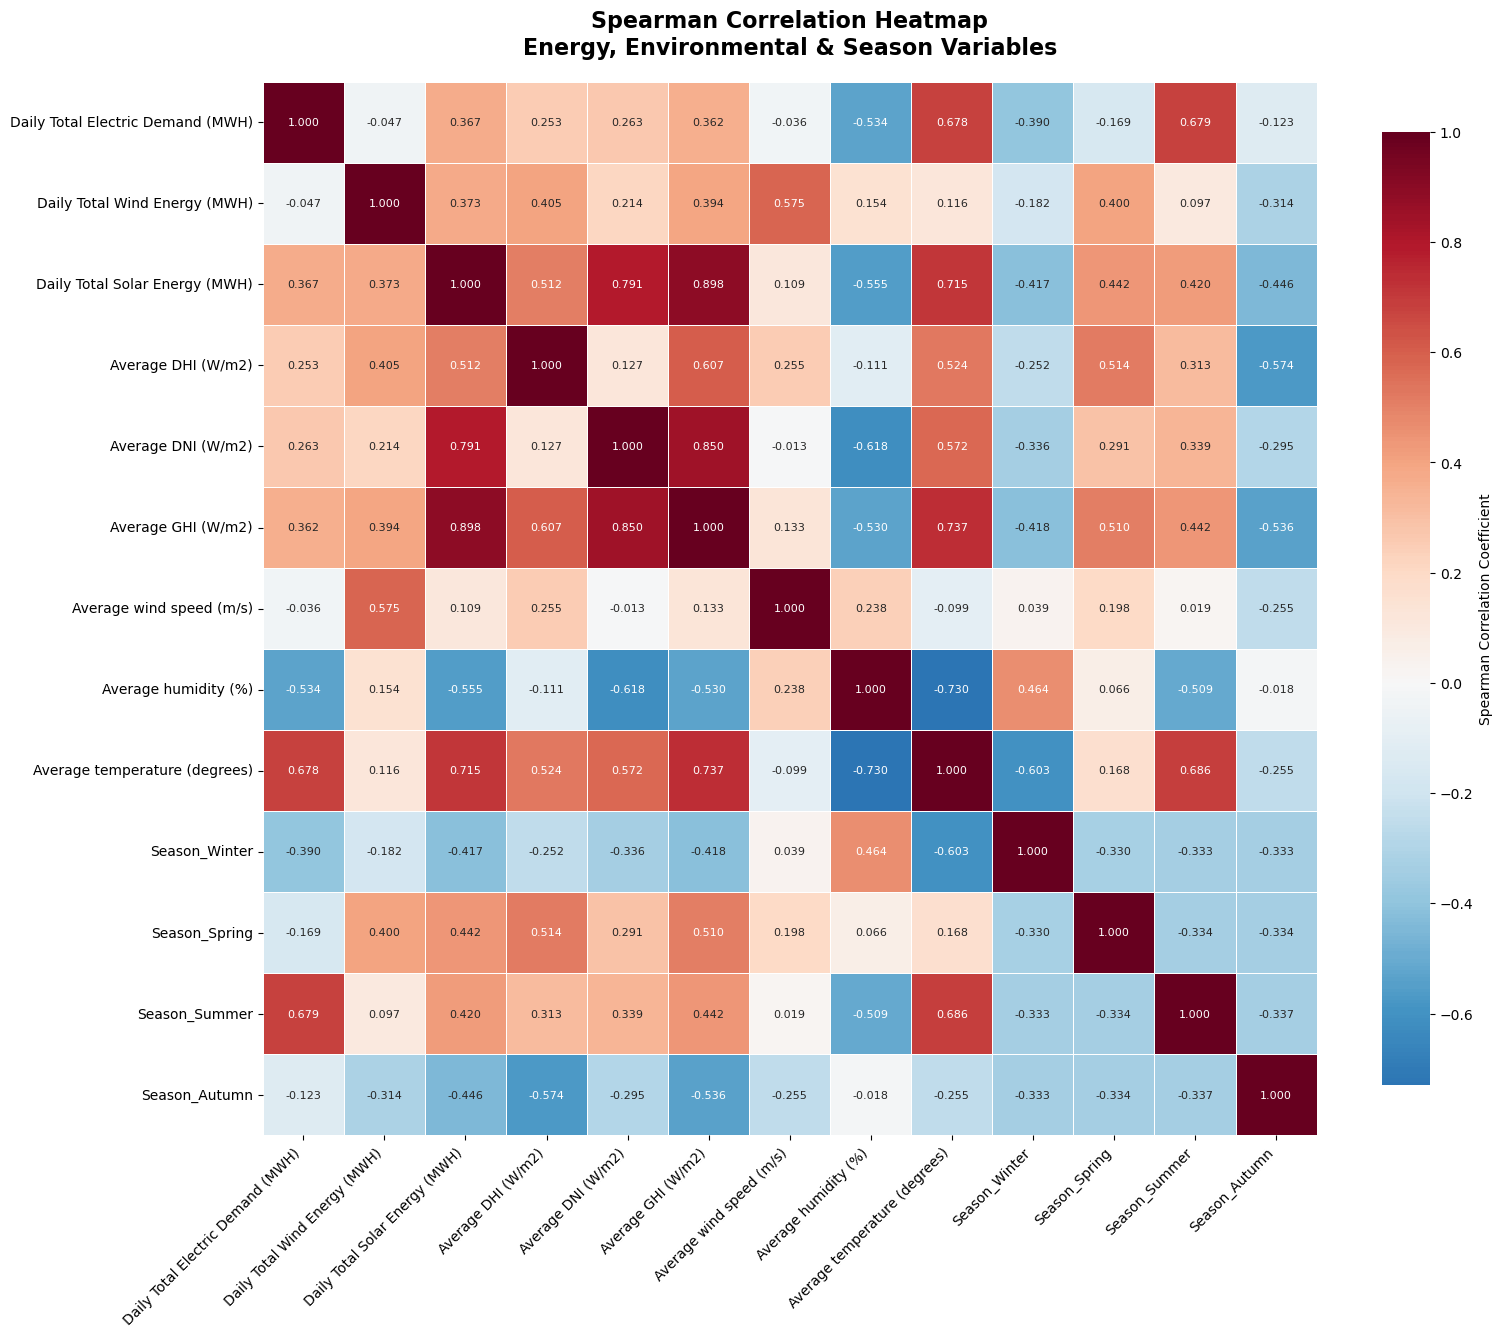


=== ANALISIS KORELASI DETAIL ===
KORELASI KUAT (|r| ≥ 0.7): 6 pasangan
  Daily Total Solar Energy (MWH) ↔ Average GHI (W/m2): 0.898 (positif)
  Average DNI (W/m2) ↔ Average GHI (W/m2): 0.850 (positif)
  Daily Total Solar Energy (MWH) ↔ Average DNI (W/m2): 0.791 (positif)
  Average GHI (W/m2) ↔ Average temperature (degrees): 0.737 (positif)
  Average humidity (%) ↔ Average temperature (degrees): -0.730 (negatif)
  Daily Total Solar Energy (MWH) ↔ Average temperature (degrees): 0.715 (positif)

KORELASI SEDANG (0.5 ≤ |r| < 0.7): 18 pasangan
  Average temperature (degrees) ↔ Season_Summer: 0.686 (positif)
  Daily Total Electric Demand (MWH) ↔ Season_Summer: 0.679 (positif)
  Daily Total Electric Demand (MWH) ↔ Average temperature (degrees): 0.678 (positif)
  Average DNI (W/m2) ↔ Average humidity (%): -0.618 (negatif)
  Average DHI (W/m2) ↔ Average GHI (W/m2): 0.607 (positif)
  Average temperature (degrees) ↔ Season_Winter: -0.603 (negatif)
  Daily Total Wind Energy (MWH) ↔ Average wind s

In [2]:
# Heatmap Korelasi Spearman - Energy, Environmental, dan Season Variables
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

dataset_no_outliers = pd.read_csv('dataset_no_outliers.csv')
aggregated_dataset_encoded = pd.read_csv('aggregated_dataset_encoded.csv')

print("=== HEATMAP KORELASI SPEARMAN - AGGREGATED DATASET ENCODED ===")

# Cek apakah dataset_no_outliers tersedia
if 'dataset_no_outliers' in locals():
    print("✓ Dataset tanpa outliers ditemukan")
    print(f"Shape dataset: {dataset_no_outliers.shape}")
    
    # Define kolom yang akan dianalisis
    columns_for_correlation = [
        # Energy columns
        'Daily Total Electric Demand (MWH)',
        'Daily Total Wind Energy (MWH)',
        'Daily Total Solar Energy (MWH)',
        
        # Environmental columns
        'Average DHI (W/m2)',
        'Average DNI (W/m2)',
        'Average GHI (W/m2)',
        'Average wind speed (m/s)',
        'Average humidity (%)',
        'Average temperature (degrees)',
        
        # Season one-hot encoded columns
        'Season_Winter',
        'Season_Spring',
        'Season_Summer',
        'Season_Autumn'
    ]
    
    print(f"\nKolom untuk analisis korelasi: {len(columns_for_correlation)}")
    
    # Cek kolom yang tersedia
    available_columns = [col for col in columns_for_correlation if col in dataset_no_outliers.columns]
    missing_columns = [col for col in columns_for_correlation if col not in dataset_no_outliers.columns]

    print(f"Kolom tersedia: {len(available_columns)}")
    if missing_columns:
        print(f"Kolom tidak ditemukan: {missing_columns}")
        print("\nKolom yang tersedia dalam dataset:")
        season_cols = [col for col in dataset_no_outliers.columns if 'Season_' in col]
        print(f"Season columns: {season_cols}")
    
    print(f"\nKolom yang akan dianalisis:")
    energy_cols = [col for col in available_columns if 'Daily Total' in col]
    env_cols = [col for col in available_columns if 'Average' in col]
    season_cols = [col for col in available_columns if 'Season_' in col]
    
    print(f"Energy Variables ({len(energy_cols)}):")
    for i, col in enumerate(energy_cols, 1):
        print(f"  {i}. {col}")
        
    print(f"\nEnvironmental Variables ({len(env_cols)}):")
    for i, col in enumerate(env_cols, 1):
        print(f"  {i}. {col}")
        
    print(f"\nSeason Variables ({len(season_cols)}):")
    for i, col in enumerate(season_cols, 1):
        print(f"  {i}. {col}")
    
    if len(available_columns) >= 2:
        
        print(f"\n=== MENGHITUNG KORELASI SPEARMAN ===")
        print("Menggunakan Spearman correlation karena:")
        print("- Robust terhadap outliers")
        print("- Tidak mengasumsikan distribusi normal")
        print("- Menangkap hubungan non-linear monotonic")
        print("- Cocok untuk data dengan skewness tinggi")
        
        # Prepare data for correlation
        correlation_data = aggregated_dataset_encoded[available_columns].copy()
        
        # Check for missing values
        missing_data = correlation_data.isnull().sum()
        print(f"\n=== CEK MISSING VALUES ===")
        if missing_data.sum() > 0:
            print("Missing values ditemukan:")
            for col, missing_count in missing_data.items():
                if missing_count > 0:
                    print(f"  {col}: {missing_count} missing")
            
            # Handle missing values
            print("\nMenangani missing values dengan median imputation...")
            correlation_data = correlation_data.fillna(correlation_data.median())
        else:
            print("✓ Tidak ada missing values")
        
        # Calculate Spearman correlation
        print(f"\n=== MENGHITUNG MATRIX KORELASI ===")
        spearman_corr = correlation_data.corr(method='spearman')
        
        print(f"Matrix korelasi berukuran: {spearman_corr.shape}")
        print(f"Range korelasi: {spearman_corr.min().min():.3f} to {spearman_corr.max().max():.3f}")
        
        # Create enhanced heatmap
        print(f"\n=== MEMBUAT HEATMAP KORELASI ===")
        
        # Set up the matplotlib figure
        plt.figure(figsize=(16, 14))
        
        # Create mask for upper triangle (optional - for cleaner look)
        mask = np.triu(np.ones_like(spearman_corr, dtype=bool), k=1)
        
        # Generate heatmap
        heatmap = sns.heatmap(
            spearman_corr,
            mask=None,  # Show full matrix
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',  # Red-Blue colormap (red for positive, blue for negative)
            center=0,
            square=True,
            cbar_kws={"shrink": 0.8, "label": "Spearman Correlation Coefficient"},
            linewidths=0.5,
            annot_kws={'size': 8}
        )
        
        # Customize the plot
        plt.title('Spearman Correlation Heatmap\nEnergy, Environmental & Season Variables', 
                 fontsize=16, fontweight='bold', pad=20)
        
        # Rotate labels for better readability
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        
        # Adjust layout
        plt.tight_layout()
        plt.show()
        
        # Create a more detailed analysis
        print(f"\n=== ANALISIS KORELASI DETAIL ===")
        
        # Find strong correlations (>0.7 or <-0.7)
        strong_threshold = 0.7
        moderate_threshold = 0.5
        
        # Get correlation pairs (exclude diagonal)
        correlation_pairs = []
        for i in range(len(spearman_corr.columns)):
            for j in range(i+1, len(spearman_corr.columns)):
                col1 = spearman_corr.columns[i]
                col2 = spearman_corr.columns[j]
                corr_value = spearman_corr.iloc[i, j]
                correlation_pairs.append({
                    'Variable1': col1,
                    'Variable2': col2,
                    'Correlation': corr_value,
                    'Abs_Correlation': abs(corr_value)
                })
        
        # Convert to DataFrame and sort
        corr_df = pd.DataFrame(correlation_pairs)
        corr_df_sorted = corr_df.sort_values('Abs_Correlation', ascending=False)
        
        # Categorize correlations
        strong_corr = corr_df_sorted[corr_df_sorted['Abs_Correlation'] >= strong_threshold]
        moderate_corr = corr_df_sorted[
            (corr_df_sorted['Abs_Correlation'] >= moderate_threshold) & 
            (corr_df_sorted['Abs_Correlation'] < strong_threshold)
        ]
        weak_corr = corr_df_sorted[corr_df_sorted['Abs_Correlation'] < moderate_threshold]
        
        print(f"KORELASI KUAT (|r| ≥ {strong_threshold}): {len(strong_corr)} pasangan")
        if len(strong_corr) > 0:
            for _, row in strong_corr.head(10).iterrows():
                direction = "positif" if row['Correlation'] > 0 else "negatif"
                print(f"  {row['Variable1']} ↔ {row['Variable2']}: {row['Correlation']:.3f} ({direction})")
                
        print(f"\nKORELASI SEDANG ({moderate_threshold} ≤ |r| < {strong_threshold}): {len(moderate_corr)} pasangan")
        if len(moderate_corr) > 0:
            for _, row in moderate_corr.head(10).iterrows():
                direction = "positif" if row['Correlation'] > 0 else "negatif"
                print(f"  {row['Variable1']} ↔ {row['Variable2']}: {row['Correlation']:.3f} ({direction})")
        
        print(f"\nKORELASI LEMAH (|r| < {moderate_threshold}): {len(weak_corr)} pasangan")
        
        # Specific analysis by categories
        print(f"\n=== ANALISIS PER KATEGORI ===")
        
        # Energy-Energy correlations
        energy_energy_corr = []
        for i, col1 in enumerate(energy_cols):
            for j, col2 in enumerate(energy_cols):
                if i < j:  # Avoid duplicates
                    corr_val = spearman_corr.loc[col1, col2]
                    energy_energy_corr.append((col1, col2, corr_val))
        
        print(f"KORELASI ANTAR ENERGY VARIABLES:")
        for col1, col2, corr_val in sorted(energy_energy_corr, key=lambda x: abs(x[2]), reverse=True):
            direction = "positif" if corr_val > 0 else "negatif"
            strength = "kuat" if abs(corr_val) >= strong_threshold else "sedang" if abs(corr_val) >= moderate_threshold else "lemah"
            print(f"  {col1} ↔ {col2}: {corr_val:.3f} ({direction}, {strength})")
        
        # Energy-Environmental correlations
        energy_env_corr = []
        for energy_col in energy_cols:
            for env_col in env_cols:
                corr_val = spearman_corr.loc[energy_col, env_col]
                energy_env_corr.append((energy_col, env_col, corr_val))
        
        print(f"\nKORELASI ENERGY vs ENVIRONMENTAL (Top 10):")
        for energy_col, env_col, corr_val in sorted(energy_env_corr, key=lambda x: abs(x[2]), reverse=True)[:10]:
            direction = "positif" if corr_val > 0 else "negatif"
            strength = "kuat" if abs(corr_val) >= strong_threshold else "sedang" if abs(corr_val) >= moderate_threshold else "lemah"
            print(f"  {energy_col} ↔ {env_col}: {corr_val:.3f} ({direction}, {strength})")
        
        # Energy-Season correlations
        energy_season_corr = []
        for energy_col in energy_cols:
            for season_col in season_cols:
                corr_val = spearman_corr.loc[energy_col, season_col]
                energy_season_corr.append((energy_col, season_col, corr_val))
        
        print(f"\nKORELASI ENERGY vs SEASON:")
        for energy_col, season_col, corr_val in sorted(energy_season_corr, key=lambda x: abs(x[2]), reverse=True):
            direction = "positif" if corr_val > 0 else "negatif"
            strength = "kuat" if abs(corr_val) >= strong_threshold else "sedang" if abs(corr_val) >= moderate_threshold else "lemah"
            print(f"  {energy_col} ↔ {season_col}: {corr_val:.3f} ({direction}, {strength})")
        
        # Environmental-Season correlations
        env_season_corr = []
        for env_col in env_cols:
            for season_col in season_cols:
                corr_val = spearman_corr.loc[env_col, season_col]
                env_season_corr.append((env_col, season_col, corr_val))
        
        print(f"\nKORELASI ENVIRONMENTAL vs SEASON (Top 10):")
        for env_col, season_col, corr_val in sorted(env_season_corr, key=lambda x: abs(x[2]), reverse=True)[:10]:
            direction = "positif" if corr_val > 0 else "negatif"
            strength = "kuat" if abs(corr_val) >= strong_threshold else "sedang" if abs(corr_val) >= moderate_threshold else "lemah"
            print(f"  {env_col} ↔ {season_col}: {corr_val:.3f} ({direction}, {strength})")
        
        # Statistical summary
        print(f"\n=== RINGKASAN STATISTIK KORELASI ===")
        all_correlations = []
        for i in range(len(spearman_corr.columns)):
            for j in range(i+1, len(spearman_corr.columns)):
                all_correlations.append(spearman_corr.iloc[i, j])
        
        all_correlations = np.array(all_correlations)
        
        print(f"Total pasangan variabel: {len(all_correlations)}")
        print(f"Korelasi rata-rata: {np.mean(all_correlations):.3f}")
        print(f"Korelasi median: {np.median(all_correlations):.3f}")
        print(f"Standar deviasi: {np.std(all_correlations):.3f}")
        print(f"Min korelasi: {np.min(all_correlations):.3f}")
        print(f"Max korelasi: {np.max(all_correlations):.3f}")
        
        # Count by strength
        strong_count = np.sum(np.abs(all_correlations) >= strong_threshold)
        moderate_count = np.sum((np.abs(all_correlations) >= moderate_threshold) & (np.abs(all_correlations) < strong_threshold))
        weak_count = np.sum(np.abs(all_correlations) < moderate_threshold)
        
        print(f"\nDistribusi kekuatan korelasi:")
        print(f"  Kuat (|r| ≥ {strong_threshold}): {strong_count} ({strong_count/len(all_correlations)*100:.1f}%)")
        print(f"  Sedang ({moderate_threshold} ≤ |r| < {strong_threshold}): {moderate_count} ({moderate_count/len(all_correlations)*100:.1f}%)")
        print(f"  Lemah (|r| < {moderate_threshold}): {weak_count} ({weak_count/len(all_correlations)*100:.1f}%)")
        
        # Save correlation matrix for further analysis
        print(f"\n=== MENYIMPAN HASIL ===")
        print(f"Matrix korelasi Spearman tersimpan dalam variabel: spearman_corr")
        print(f"DataFrame pasangan korelasi tersimpan dalam: corr_df_sorted")
        
        # Key insights
        print(f"\n=== KEY INSIGHTS ===")
        
        # Find the strongest positive and negative correlations
        max_corr_idx = np.argmax(all_correlations)
        min_corr_idx = np.argmin(all_correlations)
        
        max_corr_pair = corr_df_sorted.iloc[0]  # Already sorted by absolute value
        min_corr_pair = corr_df_sorted[corr_df_sorted['Correlation'] == np.min(all_correlations)].iloc[0]
        
        print(f"Korelasi positif terkuat:")
        strongest_positive = corr_df_sorted[corr_df_sorted['Correlation'] > 0].iloc[0]
        print(f"  {strongest_positive['Variable1']} ↔ {strongest_positive['Variable2']}: {strongest_positive['Correlation']:.3f}")
        
        print(f"Korelasi negatif terkuat:")
        strongest_negative = corr_df_sorted[corr_df_sorted['Correlation'] < 0].iloc[0]
        print(f"  {strongest_negative['Variable1']} ↔ {strongest_negative['Variable2']}: {strongest_negative['Correlation']:.3f}")
        
        print(f"\n✓ Analisis korelasi Spearman selesai")
        print(f"✓ Heatmap menunjukkan hubungan antar {len(available_columns)} variabel")
        print(f"✓ Spearman correlation cocok untuk data dengan outliers dan distribusi non-normal")
        print(f"✓ Gunakan hasil ini untuk feature selection dan pemahaman hubungan variabel")
        
    else:
        print("❌ Tidak cukup kolom untuk analisis korelasi (minimal 2 kolom)")
        
else:
    print("❌ Aggregated dataset encoded tidak ditemukan")
    print("Silakan jalankan cell one-hot encoding terlebih dahulu")

In [3]:
# Analisis Korelasi Positif Kuat dan Sedang dengan Daily Total Solar Energy
import pandas as pd
import numpy as np

print("=== ANALISIS KORELASI POSITIF DENGAN DAILY TOTAL SOLAR ENERGY ===")

# Target kolom untuk analisis
target_column = 'Daily Total Solar Energy (MWH)'

# Cek apakah matrix korelasi Spearman tersedia
if 'spearman_corr' in locals() and target_column in spearman_corr.columns:
    print(f"✓ Matrix korelasi Spearman ditemukan")
    print(f"✓ Target analisis: {target_column}")
    
    # Ambil korelasi dengan Daily Total Solar Energy
    solar_correlations = spearman_corr[target_column].copy()
    
    # Hapus korelasi dengan diri sendiri (=1.0)
    solar_correlations = solar_correlations[solar_correlations.index != target_column]
    
    # Definisi threshold korelasi
    strong_threshold = 0.7
    moderate_threshold = 0.5
    
    # Filter korelasi positif saja
    positive_correlations = solar_correlations[solar_correlations > 0]
    
    # Kategorisasi berdasarkan kekuatan korelasi
    strong_positive = positive_correlations[positive_correlations >= strong_threshold]
    moderate_positive = positive_correlations[(positive_correlations >= moderate_threshold) & 
                                            (positive_correlations < strong_threshold)]
    weak_positive = positive_correlations[positive_correlations < moderate_threshold]
    
    print(f"\n=== HASIL KORELASI POSITIF DENGAN {target_column} ===")
    print(f"Total korelasi positif: {len(positive_correlations)}")
    print(f"Range korelasi positif: {positive_correlations.min():.3f} - {positive_correlations.max():.3f}")
    
    # KORELASI POSITIF KUAT (≥ 0.7)
    print(f"\n🔴 KORELASI POSITIF KUAT (r ≥ {strong_threshold}): {len(strong_positive)} kolom")
    if len(strong_positive) > 0:
        strong_sorted = strong_positive.sort_values(ascending=False)
        for i, (col, corr_val) in enumerate(strong_sorted.items(), 1):
            print(f"  {i}. {col}: {corr_val:.3f}")
            
        print(f"\n📊 Detail Korelasi Positif Kuat:")
        for i, (col, corr_val) in enumerate(strong_sorted.items(), 1):
            # Interpretasi korelasi
            if corr_val >= 0.9:
                interpretation = "sangat kuat"
            elif corr_val >= 0.8:
                interpretation = "kuat"
            else:
                interpretation = "cukup kuat"
                
            print(f"  {i}. {col}")
            print(f"     Korelasi: {corr_val:.3f} ({interpretation})")
            print(f"     Interpretasi: Solar energy {interpretation} berkorelasi positif dengan {col.lower()}")
            if 'GHI' in col:
                print(f"     Makna: Semakin tinggi radiasi matahari global, semakin tinggi produksi energi solar")
            elif 'DNI' in col:
                print(f"     Makna: Semakin tinggi radiasi matahari langsung, semakin tinggi produksi energi solar")
            elif 'temperature' in col:
                print(f"     Makna: Suhu yang lebih tinggi cenderung berkaitan dengan produksi solar yang lebih tinggi")
            print()
    else:
        print("  Tidak ada kolom dengan korelasi positif kuat")
    
    # KORELASI POSITIF SEDANG (0.5 ≤ r < 0.7)
    print(f"🟡 KORELASI POSITIF SEDANG ({moderate_threshold} ≤ r < {strong_threshold}): {len(moderate_positive)} kolom")
    if len(moderate_positive) > 0:
        moderate_sorted = moderate_positive.sort_values(ascending=False)
        for i, (col, corr_val) in enumerate(moderate_sorted.items(), 1):
            print(f"  {i}. {col}: {corr_val:.3f}")
            
        print(f"\n📊 Detail Korelasi Positif Sedang:")
        for i, (col, corr_val) in enumerate(moderate_sorted.items(), 1):
            print(f"  {i}. {col}")
            print(f"     Korelasi: {corr_val:.3f} (sedang)")
            print(f"     Interpretasi: Solar energy berkorelasi sedang dengan {col.lower()}")
            if 'DHI' in col:
                print(f"     Makna: Radiasi matahari tersebar berkontribusi pada produksi energi solar")
            elif 'Wind Energy' in col:
                print(f"     Makna: Kondisi cuaca yang mendukung solar juga mendukung wind energy")
            elif 'Electric Demand' in col:
                print(f"     Makna: Permintaan listrik berkorelasi dengan kondisi produksi solar")
            print()
    else:
        print("  Tidak ada kolom dengan korelasi positif sedang")
    
    # RINGKASAN UNTUK FEATURE SELECTION
    print(f"=== RINGKASAN UNTUK FEATURE SELECTION ===")
    
    # Gabungkan korelasi kuat dan sedang
    strong_and_moderate = pd.concat([strong_positive, moderate_positive]).sort_values(ascending=False)
    
    if len(strong_and_moderate) > 0:
        print(f"✓ Total kolom dengan korelasi positif kuat/sedang: {len(strong_and_moderate)}")
        print(f"✓ Kolom-kolom ini sangat penting untuk memprediksi Daily Total Solar Energy")
        print(f"\nUrutan prioritas berdasarkan kekuatan korelasi:")
        
        for i, (col, corr_val) in enumerate(strong_and_moderate.items(), 1):
            strength = "KUAT" if corr_val >= strong_threshold else "SEDANG"
            print(f"  {i}. {col} (r = {corr_val:.3f}) [{strength}]")
        
        # Kategorisasi berdasarkan tipe variabel
        energy_vars = []
        environmental_vars = []
        season_vars = []
        
        for col in strong_and_moderate.index:
            if 'Daily Total' in col or 'Electric Demand' in col:
                energy_vars.append(col)
            elif 'Average' in col:
                environmental_vars.append(col)
            elif 'Season_' in col:
                season_vars.append(col)
        
        print(f"\n=== KATEGORISASI VARIABEL YANG BERKORELASI POSITIF ===")
        
        if energy_vars:
            print(f"🔋 Energy Variables ({len(energy_vars)}):")
            for var in energy_vars:
                corr_val = strong_and_moderate[var]
                print(f"  • {var}: {corr_val:.3f}")
        
        if environmental_vars:
            print(f"🌤️ Environmental Variables ({len(environmental_vars)}):")
            for var in environmental_vars:
                corr_val = strong_and_moderate[var]
                print(f"  • {var}: {corr_val:.3f}")
                
        if season_vars:
            print(f"📅 Season Variables ({len(season_vars)}):")
            for var in season_vars:
                corr_val = strong_and_moderate[var]
                print(f"  • {var}: {corr_val:.3f}")
        
        # Rekomendasi modeling
        print(f"\n=== REKOMENDASI UNTUK MODELING ===")
        print(f"1. PRIORITAS TINGGI - Gunakan semua {len(strong_positive)} variabel dengan korelasi KUAT:")
        for i, (col, corr_val) in enumerate(strong_positive.sort_values(ascending=False).items(), 1):
            print(f"   {i}. {col} (r = {corr_val:.3f})")
            
        if len(moderate_positive) > 0:
            print(f"\n2. PRIORITAS SEDANG - Pertimbangkan {len(moderate_positive)} variabel dengan korelasi SEDANG:")
            for i, (col, corr_val) in enumerate(moderate_positive.sort_values(ascending=False).items(), 1):
                print(f"   {i}. {col} (r = {corr_val:.3f})")
        
        print(f"\n3. INSIGHT BISNIS:")
        print(f"   • Radiasi matahari (GHI, DNI) adalah prediktor terkuat untuk solar energy")
        print(f"   • Suhu memiliki pengaruh positif yang signifikan")
        print(f"   • Radiasi tersebar (DHI) juga berkontribusi positif")
        print(f"   • Model prediksi harus fokus pada variabel cuaca dan radiasi")
        
        # Simpan hasil untuk analisis lebih lanjut
        solar_positive_correlations = strong_and_moderate.to_frame('correlation')
        solar_positive_correlations['strength'] = solar_positive_correlations['correlation'].apply(
            lambda x: 'KUAT' if x >= strong_threshold else 'SEDANG'
        )
        solar_positive_correlations['category'] = solar_positive_correlations.index.map(
            lambda x: 'Energy' if any(term in x for term in ['Daily Total', 'Electric Demand']) 
                     else 'Environmental' if 'Average' in x 
                     else 'Season'
        )
        
        print(f"\n=== TABEL RINGKASAN ===")
        print(solar_positive_correlations.round(3))
        
        print(f"\n✅ Hasil tersimpan dalam variabel: solar_positive_correlations")
        print(f"✅ Gunakan kolom-kolom ini sebagai features utama untuk memprediksi solar energy")
        
    else:
        print("❌ Tidak ditemukan kolom dengan korelasi positif kuat atau sedang")
        
    # Tambahan: Cek juga korelasi lemah yang mungkin masih berguna
    print(f"\n=== KORELASI POSITIF LEMAH (0 < r < {moderate_threshold}) ===")
    print(f"Jumlah: {len(weak_positive)} kolom")
    if len(weak_positive) > 0:
        weak_sorted = weak_positive.sort_values(ascending=False)
        print("5 teratas:")
        for i, (col, corr_val) in enumerate(weak_sorted.head().items(), 1):
            print(f"  {i}. {col}: {corr_val:.3f}")
        print("Catatan: Korelasi lemah mungkin masih berguna sebagai features tambahan")
    
else:
    print("❌ Matrix korelasi Spearman tidak ditemukan atau kolom target tidak ada")
    print("Silakan jalankan cell analisis korelasi Spearman terlebih dahulu")

=== ANALISIS KORELASI POSITIF DENGAN DAILY TOTAL SOLAR ENERGY ===
✓ Matrix korelasi Spearman ditemukan
✓ Target analisis: Daily Total Solar Energy (MWH)

=== HASIL KORELASI POSITIF DENGAN Daily Total Solar Energy (MWH) ===
Total korelasi positif: 9
Range korelasi positif: 0.109 - 0.898

🔴 KORELASI POSITIF KUAT (r ≥ 0.7): 3 kolom
  1. Average GHI (W/m2): 0.898
  2. Average DNI (W/m2): 0.791
  3. Average temperature (degrees): 0.715

📊 Detail Korelasi Positif Kuat:
  1. Average GHI (W/m2)
     Korelasi: 0.898 (kuat)
     Interpretasi: Solar energy kuat berkorelasi positif dengan average ghi (w/m2)
     Makna: Semakin tinggi radiasi matahari global, semakin tinggi produksi energi solar

  2. Average DNI (W/m2)
     Korelasi: 0.791 (cukup kuat)
     Interpretasi: Solar energy cukup kuat berkorelasi positif dengan average dni (w/m2)
     Makna: Semakin tinggi radiasi matahari langsung, semakin tinggi produksi energi solar

  3. Average temperature (degrees)
     Korelasi: 0.715 (cukup kuat)

In [4]:
# Analisis Regresi Lanjutan untuk Kolom yang Berkorelasi Positif dengan Daily Total Solar Energy
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

print("=== ANALISIS REGRESI LANJUTAN UNTUK SOLAR ENERGY PREDICTION ===")

# Cek apakah data dan hasil korelasi tersedia
if 'dataset_no_outliers' in locals() and 'solar_positive_correlations' in locals():
    target_column = 'Daily Total Solar Energy (MWH)'
    
    # Ambil kolom yang berkorelasi positif (kuat dan sedang)
    feature_columns = solar_positive_correlations.index.tolist()
    
    print(f"✓ Target variable: {target_column}")
    print(f"✓ Feature variables ({len(feature_columns)} kolom):")
    for i, col in enumerate(feature_columns, 1):
        corr_val = solar_positive_correlations.loc[col, 'correlation']
        strength = solar_positive_correlations.loc[col, 'strength']
        print(f"  {i}. {col} (r = {corr_val:.3f}) [{strength}]")
    
    # Siapkan data untuk analisis regresi
    # Ambil data lengkap tanpa missing values
    analysis_data = aggregated_dataset_encoded[[target_column] + feature_columns].dropna()
    
    print(f"\n=== PERSIAPAN DATA ===")
    print(f"✓ Data shape setelah cleaning: {analysis_data.shape}")
    print(f"✓ Jumlah observasi: {len(analysis_data)}")
    
    # Pisahkan X dan y
    X = analysis_data[feature_columns]
    y = analysis_data[target_column]
    
    # Standardisasi features untuk VIF calculation
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
    
    print(f"\n=== HASIL ANALISIS REGRESI LANJUTAN ===")
    
    # 1. REGRESSION ANALYSIS MENGGUNAKAN STATSMODELS
    print(f"\n1️⃣ REGRESSION COEFFICIENTS & STATISTICAL TESTS")
    
    # Tambahkan konstanta untuk intercept
    X_with_const = sm.add_constant(X)
    
    # Fit model menggunakan OLS
    ols_model = sm.OLS(y, X_with_const).fit()
    
    # Buat DataFrame hasil regresi
    regression_results = pd.DataFrame({
        'Variable': feature_columns,
        'Beta_Coefficient': ols_model.params[1:],  # Skip intercept
        'Standard_Error': ols_model.bse[1:],       # Skip intercept  
        'P_Value': ols_model.pvalues[1:],          # Skip intercept
        'Correlation': [solar_positive_correlations.loc[col, 'correlation'] for col in feature_columns]
    })
    
    # 2. VARIANCE INFLATION FACTOR (VIF)
    print(f"\n2️⃣ VARIANCE INFLATION FACTOR (VIF)")
    
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Tambahkan VIF ke hasil regresi
    regression_results = regression_results.merge(
        vif_data.set_index('Variable'), 
        left_on='Variable', 
        right_index=True
    )
    
    # 3. PARTIAL R² CALCULATION
    print(f"\n3️⃣ PARTIAL R² CALCULATION")
    
    partial_r2_values = []
    
    # Hitung partial R² untuk setiap variabel
    for col in feature_columns:
        # Model lengkap (dengan semua variabel)
        full_model = LinearRegression().fit(X, y)
        full_r2 = r2_score(y, full_model.predict(X))
        
        # Model tanpa variabel tertentu
        X_reduced = X.drop(columns=[col])
        if len(X_reduced.columns) > 0:
            reduced_model = LinearRegression().fit(X_reduced, y)
            reduced_r2 = r2_score(y, reduced_model.predict(X_reduced))
            
            # Partial R² = (R²_full - R²_reduced) / (1 - R²_reduced)
            partial_r2 = (full_r2 - reduced_r2) / (1 - reduced_r2)
        else:
            # Jika hanya satu variabel, partial R² = R² simple
            simple_model = LinearRegression().fit(X[[col]], y)
            partial_r2 = r2_score(y, simple_model.predict(X[[col]]))
        
        partial_r2_values.append(partial_r2)
    
    # Tambahkan Partial R² ke hasil
    regression_results['Partial_R2'] = partial_r2_values
    
    # 4. INTERPRETASI STATISTIK
    print(f"\n4️⃣ INTERPRETASI SIGNIFICANCE LEVELS")
    
    def interpret_p_value(p_val):
        if p_val < 0.001:
            return "*** (p < 0.001) - Sangat Signifikan"
        elif p_val < 0.01:
            return "** (p < 0.01) - Signifikan"
        elif p_val < 0.05:
            return "* (p < 0.05) - Cukup Signifikan"
        else:
            return "(p ≥ 0.05) - Tidak Signifikan"
    
    def interpret_vif(vif_val):
        if vif_val > 10:
            return "TINGGI - Multicollinearity Serius"
        elif vif_val > 5:
            return "SEDANG - Multicollinearity Moderat"
        else:
            return "RENDAH - Tidak ada Multicollinearity"
    
    regression_results['P_Value_Interpretation'] = regression_results['P_Value'].apply(interpret_p_value)
    regression_results['VIF_Interpretation'] = regression_results['VIF'].apply(interpret_vif)
    
    # Sort berdasarkan korelasi tertinggi
    regression_results = regression_results.sort_values('Correlation', ascending=False)
    
    print(f"\n=== TABEL LENGKAP HASIL ANALISIS REGRESI ===")
    print(f"{'='*120}")
    print(f"{'Variable':<35} {'Beta':<8} {'Std_Err':<8} {'P_Value':<10} {'VIF':<8} {'Partial_R²':<10} {'Corr':<8}")
    print(f"{'='*120}")
    
    for _, row in regression_results.iterrows():
        print(f"{row['Variable']:<35} {row['Beta_Coefficient']:<8.3f} {row['Standard_Error']:<8.3f} {row['P_Value']:<10.6f} {row['VIF']:<8.2f} {row['Partial_R2']:<10.3f} {row['Correlation']:<8.3f}")
    
    print(f"{'='*120}")
    
    # 5. DETAILED ANALYSIS PER VARIABLE
    print(f"\n=== ANALISIS DETAIL PER VARIABEL ===")
    
    for i, (_, row) in enumerate(regression_results.iterrows(), 1):
        var_name = row['Variable']
        beta = row['Beta_Coefficient']
        std_err = row['Standard_Error']
        p_val = row['P_Value']
        vif = row['VIF']
        partial_r2 = row['Partial_R2']
        correlation = row['Correlation']
        
        print(f"\n{i}. {var_name}")
        print(f"   📊 Korelasi dengan Solar Energy: {correlation:.3f}")
        print(f"   📈 Beta Coefficient: {beta:.3f}")
        print(f"   📏 Standard Error: {std_err:.3f}")
        print(f"   🎯 P-Value: {p_val:.6f} {row['P_Value_Interpretation']}")
        print(f"   🔄 VIF: {vif:.2f} ({row['VIF_Interpretation']})")
        print(f"   📐 Partial R²: {partial_r2:.3f} ({partial_r2*100:.1f}% unique variance explained)")
        
        # Interpretasi Beta Coefficient
        if beta > 0:
            print(f"   💡 Interpretasi: Setiap peningkatan 1 unit {var_name.lower()} ")
            print(f"      meningkatkan Solar Energy sebesar {beta:.3f} MWH")
        else:
            print(f"   💡 Interpretasi: Setiap peningkatan 1 unit {var_name.lower()}")
            print(f"      menurunkan Solar Energy sebesar {abs(beta):.3f} MWH")
    
    # 6. MODEL PERFORMANCE SUMMARY
    print(f"\n=== RINGKASAN PERFORMA MODEL ===")
    print(f"📊 R² Model Lengkap: {ols_model.rsquared:.3f} ({ols_model.rsquared*100:.1f}% variance explained)")
    print(f"📊 Adjusted R²: {ols_model.rsquared_adj:.3f}")
    print(f"📊 F-Statistic: {ols_model.fvalue:.3f}")
    print(f"📊 F-Statistic P-Value: {ols_model.f_pvalue:.6f}")
    print(f"📊 AIC: {ols_model.aic:.2f}")
    print(f"📊 BIC: {ols_model.bic:.2f}")
    
    # 7. REKOMENDASI BERDASARKAN HASIL
    print(f"\n=== REKOMENDASI & KESIMPULAN ===")
    
    # Variabel signifikan
    significant_vars = regression_results[regression_results['P_Value'] < 0.05]
    
    print(f"✅ VARIABEL SIGNIFIKAN ({len(significant_vars)}/{len(regression_results)}):")
    for _, row in significant_vars.iterrows():
        print(f"   • {row['Variable']} (p = {row['P_Value']:.6f})")
    
    # Variabel dengan VIF tinggi
    high_vif = regression_results[regression_results['VIF'] > 5]
    if len(high_vif) > 0:
        print(f"\n⚠️ MULTICOLLINEARITY WARNING ({len(high_vif)} variabel):")
        for _, row in high_vif.iterrows():
            print(f"   • {row['Variable']} (VIF = {row['VIF']:.2f})")
        print(f"   Pertimbangkan untuk menghapus salah satu variabel yang berkorelasi tinggi")
    
    # Variabel dengan kontribusi unik terbesar
    top_partial = regression_results.nlargest(3, 'Partial_R2')
    print(f"\n🏆 TOP 3 KONTRIBUTOR UNIK (Partial R²):")
    for i, (_, row) in enumerate(top_partial.iterrows(), 1):
        print(f"   {i}. {row['Variable']}: {row['Partial_R2']:.3f} ({row['Partial_R2']*100:.1f}% unique variance)")
    
    # Simpan hasil
    print(f"\n✅ Hasil tersimpan dalam variabel: regression_results")
    print(f"✅ Model OLS tersimpan dalam variabel: ols_model")
    print(f"✅ Gunakan hasil ini untuk feature selection dan model optimization")
    
    # Export summary
    print(f"\n=== EXPORT SUMMARY ===")
    summary_table = regression_results[['Variable', 'Beta_Coefficient', 'Standard_Error', 
                                      'P_Value', 'VIF', 'Partial_R2', 'Correlation']].round(6)
    
    print("Copy-paste ready summary:")
    print(summary_table.to_string(index=False))
    
else:
    print("❌ Data aggregated_dataset_encoded atau solar_positive_correlations tidak ditemukan")
    print("Silakan jalankan cell sebelumnya terlebih dahulu")

=== ANALISIS REGRESI LANJUTAN UNTUK SOLAR ENERGY PREDICTION ===
✓ Target variable: Daily Total Solar Energy (MWH)
✓ Feature variables (4 kolom):
  1. Average GHI (W/m2) (r = 0.898) [KUAT]
  2. Average DNI (W/m2) (r = 0.791) [KUAT]
  3. Average temperature (degrees) (r = 0.715) [KUAT]
  4. Average DHI (W/m2) (r = 0.512) [SEDANG]

=== PERSIAPAN DATA ===
✓ Data shape setelah cleaning: (1096, 5)
✓ Jumlah observasi: 1096

=== HASIL ANALISIS REGRESI LANJUTAN ===

1️⃣ REGRESSION COEFFICIENTS & STATISTICAL TESTS

2️⃣ VARIANCE INFLATION FACTOR (VIF)

3️⃣ PARTIAL R² CALCULATION

4️⃣ INTERPRETASI SIGNIFICANCE LEVELS

=== TABEL LENGKAP HASIL ANALISIS REGRESI ===
Variable                            Beta     Std_Err  P_Value    VIF      Partial_R² Corr    
Average GHI (W/m2)                  144.945  22.809   0.000000   66.12    0.036      0.898   
Average DNI (W/m2)                  101.605  16.783   0.000000   38.15    0.033      0.791   
Average temperature (degrees)       456.292  79.452   0.000

In [5]:
# =============================================================================
# PRINCIPAL COMPONENT ANALYSIS (PCA) UNTUK MENGURANGI VIF
# =============================================================================

print("=" * 80)
print("🔬 PRINCIPAL COMPONENT ANALYSIS (PCA) UNTUK MENGURANGI VIF")
print("=" * 80)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Menggunakan semua kolom yang berkorelasi positif
original_features = [
    'Average GHI (W/m2)',
    'Average DNI (W/m2)', 
    'Average temperature (degrees)',
    'Average DHI (W/m2)'
]

target_column = 'Daily Total Solar Energy (MWH)'

print(f"✓ Target variable: {target_column}")
print(f"✓ Original features ({len(original_features)} kolom):")
for i, col in enumerate(original_features, 1):
    corr_with_target = analysis_data[col].corr(analysis_data[target_column])
    print(f"  {i}. {col} (r = {corr_with_target:.3f})")

# Persiapan data
X_original = analysis_data[original_features].copy()
y = analysis_data[target_column].copy()

print(f"\n✓ Data shape original: {X_original.shape}")

# ============================================
# 1. STANDARDISASI DATA
# ============================================

print("\n" + "="*60)
print("1️⃣ STANDARDISASI DATA UNTUK PCA")
print("="*60)

print("💡 CATATAN TENTANG STANDARDISASI:")
print("   • StandardScaler sudah digunakan di analisis sebelumnya")
print("   • Tidak masalah menggunakan StandardScaler lagi untuk PCA")
print("   • Setiap StandardScaler instance terpisah dan independen")
print("   • PCA membutuhkan data yang ter-standardisasi untuk hasil optimal")

# Cek apakah sudah ada data ter-standardisasi
if 'X_scaled' in locals() and set(original_features).issubset(set(X_scaled.columns)):
    print("\n✅ Menggunakan data yang sudah ter-standardisasi dari analisis sebelumnya")
    X_scaled_pca = X_scaled[original_features].values
    scaler_pca = scaler  # Gunakan scaler yang sudah ada
    X_scaled_df = X_scaled[original_features].copy()
else:
    print("\n🔧 Membuat StandardScaler baru untuk PCA")
    # Standardisasi data (penting untuk PCA)
    scaler_pca = StandardScaler()
    X_scaled_pca = scaler_pca.fit_transform(X_original)
    X_scaled_df = pd.DataFrame(X_scaled_pca, columns=original_features, index=X_original.index)

print("\nStatistik data original:")
print(X_original.describe().round(2))

print("\nStatistik data ter-standardisasi:")
print(X_scaled_df.describe().round(2))

# ============================================
# 2. ANALISIS KOMPONEN UTAMA
# ============================================

print("\n" + "="*60)
print("2️⃣ ANALISIS KOMPONEN UTAMA (PCA)")
print("="*60)

# Fit PCA dengan semua komponen
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled_pca)

# Explained variance ratio
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance per Principal Component:")
print("="*50)
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {var:.4f} ({var*100:.1f}%) | Cumulative: {cum_var:.4f} ({cum_var*100:.1f}%)")

# Tentukan jumlah komponen optimal
# Kriteria: mencakup minimal 95% variance
optimal_components = np.where(cumulative_variance >= 0.95)[0][0] + 1
components_90 = np.where(cumulative_variance >= 0.90)[0][0] + 1

print(f"\n📊 KOMPONEN OPTIMAL:")
print(f"   • Untuk 90% variance: {components_90} komponen")
print(f"   • Untuk 95% variance: {optimal_components} komponen")

# ============================================
# 3. LOADINGS ANALYSIS
# ============================================

print("\n" + "="*60)
print("3️⃣ PRINCIPAL COMPONENT LOADINGS")
print("="*60)

# Component loadings (eigenvectors)
loadings = pca_full.components_.T * np.sqrt(pca_full.explained_variance_)
loadings_df = pd.DataFrame(loadings, 
                          columns=[f'PC{i+1}' for i in range(len(original_features))],
                          index=original_features)

print("Component Loadings Matrix:")
print("="*70)
print(loadings_df.round(3))

# Interpretasi komponen
print(f"\n🔍 INTERPRETASI KOMPONEN:")
for i in range(min(3, len(original_features))):  # Tampilkan max 3 komponen pertama
    pc_name = f"PC{i+1}"
    pc_loadings = loadings_df[pc_name].abs().sort_values(ascending=False)
    dominant_vars = pc_loadings.head(2)
    
    print(f"\n   {pc_name} (explains {explained_variance[i]*100:.1f}% variance):")
    print(f"      Dominated by: {dominant_vars.index[0]} ({dominant_vars.iloc[0]:.3f})")
    if len(dominant_vars) > 1:
        print(f"                   {dominant_vars.index[1]} ({dominant_vars.iloc[1]:.3f})")

# ============================================
# 4. PCA MODELS DENGAN BERBAGAI KOMPONEN
# ============================================

print("\n" + "="*60)
print("4️⃣ REGRESI DENGAN BERBAGAI JUMLAH KOMPONEN PCA")
print("="*60)

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Test berbagai jumlah komponen
pca_results = {}
components_to_test = [1, 2, 3, 4]

for n_comp in components_to_test:
    # PCA dengan n komponen
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X_scaled_pca)
    
    # Buat DataFrame untuk kemudahan
    pc_columns = [f'PC{i+1}' for i in range(n_comp)]
    X_pca_df = pd.DataFrame(X_pca, columns=pc_columns, index=X_original.index)
    
    # Regression dengan sklearn
    lr_pca = LinearRegression()
    lr_pca.fit(X_pca, y)
    r2_pca = lr_pca.score(X_pca, y)
    
    # Regression dengan statsmodels untuk detailed stats
    X_pca_const = sm.add_constant(X_pca_df)
    ols_pca = sm.OLS(y, X_pca_const).fit()
    
    # VIF untuk komponen PCA (seharusnya = 1 karena orthogonal)
    if n_comp > 1:
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        vif_pca = [variance_inflation_factor(X_pca, i) for i in range(n_comp)]
        max_vif_pca = max(vif_pca)
        avg_vif_pca = np.mean(vif_pca)
    else:
        vif_pca = [1.0]
        max_vif_pca = 1.0
        avg_vif_pca = 1.0
    
    pca_results[n_comp] = {
        'r2': r2_pca,
        'adj_r2': ols_pca.rsquared_adj,
        'explained_var': cumulative_variance[n_comp-1],
        'max_vif': max_vif_pca,
        'avg_vif': avg_vif_pca,
        'aic': ols_pca.aic,
        'bic': ols_pca.bic,
        'f_stat': ols_pca.fvalue,
        'f_pvalue': ols_pca.f_pvalue,
        'pca_object': pca,
        'ols_object': ols_pca,
        'X_pca': X_pca_df
    }

# Tampilkan hasil
print("PERBANDINGAN MODEL PCA:")
print("="*100)
print(f"{'Components':<12} {'R²':<8} {'Adj R²':<8} {'Expl Var':<10} {'Max VIF':<8} {'Avg VIF':<8} {'AIC':<10} {'F-stat':<8}")
print("="*100)

for n_comp, results in pca_results.items():
    print(f"{n_comp:<12} {results['r2']:<8.4f} {results['adj_r2']:<8.4f} "
          f"{results['explained_var']:<10.4f} {results['max_vif']:<8.2f} {results['avg_vif']:<8.2f} "
          f"{results['aic']:<10.1f} {results['f_stat']:<8.1f}")

print("\n" + "="*80)

🔬 PRINCIPAL COMPONENT ANALYSIS (PCA) UNTUK MENGURANGI VIF
✓ Target variable: Daily Total Solar Energy (MWH)
✓ Original features (4 kolom):
  1. Average GHI (W/m2) (r = 0.898)
  2. Average DNI (W/m2) (r = 0.807)
  3. Average temperature (degrees) (r = 0.702)
  4. Average DHI (W/m2) (r = 0.461)

✓ Data shape original: (1096, 4)

1️⃣ STANDARDISASI DATA UNTUK PCA
💡 CATATAN TENTANG STANDARDISASI:
   • StandardScaler sudah digunakan di analisis sebelumnya
   • Tidak masalah menggunakan StandardScaler lagi untuk PCA
   • Setiap StandardScaler instance terpisah dan independen
   • PCA membutuhkan data yang ter-standardisasi untuk hasil optimal

✅ Menggunakan data yang sudah ter-standardisasi dari analisis sebelumnya

Statistik data original:
       Average GHI (W/m2)  Average DNI (W/m2)  Average temperature (degrees)  \
count             1096.00             1096.00                        1096.00   
mean               221.79              288.06                          17.47   
std             

In [ ]:
# =============================================================================
# ANALISIS VIF DETAIL UNTUK KOMPONEN PCA
# =============================================================================

print("=" * 80)
print("📊 ANALISIS VIF DETAIL UNTUK KOMPONEN PCA")
print("=" * 80)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# ============================================
# 1. VIF UNTUK SETIAP MODEL PCA
# ============================================

print("\n" + "="*70)
print("1️⃣ VIF UNTUK SETIAP KOMPONEN PCA")
print("="*70)

# Analisis VIF untuk setiap jumlah komponen PCA
vif_pca_detailed = {}

for n_comp in [1, 2, 3, 4]:
    print(f"\n🔍 PCA dengan {n_comp} Komponen:")
    print("-" * 40)
    
    if n_comp in pca_results:
        X_pca_current = pca_results[n_comp]['X_pca']
        
        if n_comp == 1:
            # Untuk 1 komponen, VIF selalu 1
            vif_values = [1.0]
            print(f"   PC1: VIF = 1.000 (Perfect - hanya 1 komponen)")
        else:
            # Hitung VIF untuk setiap komponen
            vif_values = []
            for i in range(n_comp):
                vif = variance_inflation_factor(X_pca_current.values, i)
                vif_values.append(vif)
                status = "Perfect" if vif < 1.1 else "Excellent" if vif < 2 else "Good" if vif < 5 else "Concern"
                print(f"   PC{i+1}: VIF = {vif:.3f} ({status})")
        
        # Statistik VIF untuk model ini
        max_vif = max(vif_values)
        min_vif = min(vif_values)
        avg_vif = sum(vif_values) / len(vif_values)
        
        vif_pca_detailed[n_comp] = {
            'vif_values': vif_values,
            'max_vif': max_vif,
            'min_vif': min_vif,
            'avg_vif': avg_vif,
            'r2': pca_results[n_comp]['r2'],
            'explained_variance': pca_results[n_comp]['explained_var']
        }
        
        print(f"   📊 Max VIF: {max_vif:.3f} | Min VIF: {min_vif:.3f} | Avg VIF: {avg_vif:.3f}")
        print(f"   📈 R²: {pca_results[n_comp]['r2']:.4f} | Explained Variance: {pca_results[n_comp]['explained_var']*100:.1f}%")

# ============================================
# 2. PERBANDINGAN VIF: ORIGINAL vs PCA
# ============================================

print("\n" + "="*70)
print("2️⃣ PERBANDINGAN VIF: ORIGINAL vs PCA MODELS")
print("="*70)

# VIF dari model original (dari analisis sebelumnya)
original_vif = {
    'Average GHI (W/m2)': 66.12,
    'Average DNI (W/m2)': 38.15,
    'Average temperature (degrees)': 17.42,
    'Average DHI (W/m2)': 13.59
}

print("TABEL PERBANDINGAN VIF:")
print("="*100)
print(f"{'Model':<20} {'Variables':<12} {'Max VIF':<10} {'Min VIF':<10} {'Avg VIF':<10} {'R²':<8} {'Status':<15}")
print("="*100)

# Original model
orig_max_vif = max(original_vif.values())
orig_min_vif = min(original_vif.values())
orig_avg_vif = sum(original_vif.values()) / len(original_vif)
orig_status = "High Multicollinearity"
print(f"{'Original':<20} {len(original_vif):<12} {orig_max_vif:<10.2f} {orig_min_vif:<10.2f} {orig_avg_vif:<10.2f} {full_r2:<8.4f} {orig_status:<15}")

# PCA models
for n_comp, vif_data in vif_pca_detailed.items():
    model_name = f"PCA ({n_comp} comp)"
    vif_status = "Perfect" if vif_data['max_vif'] < 1.1 else "Excellent" if vif_data['max_vif'] < 2 else "Good"
    
    print(f"{model_name:<20} {n_comp:<12} {vif_data['max_vif']:<10.3f} {vif_data['min_vif']:<10.3f} "
          f"{vif_data['avg_vif']:<10.3f} {vif_data['r2']:<8.4f} {vif_status:<15}")

# ============================================
# 3. KORELASI ANTAR KOMPONEN PCA
# ============================================

print("\n" + "="*70)
print("3️⃣ KORELASI ANTAR KOMPONEN PCA")
print("="*70)

# Untuk model PCA dengan 2, 3, dan 4 komponen, tampilkan korelasi antar komponen
for n_comp in [2, 3, 4]:
    if n_comp in pca_results:
        print(f"\n🔍 Korelasi antar komponen PCA ({n_comp} komponen):")
        print("-" * 50)
        
        X_pca_current = pca_results[n_comp]['X_pca']
        correlation_matrix = X_pca_current.corr()
        
        print("Correlation Matrix:")
        print(correlation_matrix.round(6))
        
        # Cek apakah komponen benar-benar orthogonal
        off_diagonal = []
        for i in range(n_comp):
            for j in range(i+1, n_comp):
                corr_val = correlation_matrix.iloc[i, j]
                off_diagonal.append(abs(corr_val))
                
        max_off_diagonal = max(off_diagonal) if off_diagonal else 0
        print(f"\n   📊 Maximum off-diagonal correlation: {max_off_diagonal:.8f}")
        
        if max_off_diagonal < 1e-10:
            print("   ✅ Perfect orthogonality - komponen benar-benar independen")
        elif max_off_diagonal < 1e-6:
            print("   ✅ Excellent orthogonality - komponen hampir independen")
        else:
            print("   ⚠️ Slight correlation detected - periksa transformasi PCA")

# ============================================
# 4. REKOMENDASI BERDASARKAN VIF ANALYSIS
# ============================================

print("\n" + "="*70)
print("4️⃣ REKOMENDASI BERDASARKAN VIF ANALYSIS")
print("="*70)

print("🎯 RINGKASAN VIF IMPROVEMENT:")

# Hitung improvement dari original ke PCA
best_pca_model = 2  # Ambil 2 komponen sebagai contoh
pca_2_vif = vif_pca_detailed[best_pca_model]

vif_improvement = ((orig_max_vif - pca_2_vif['max_vif']) / orig_max_vif) * 100
r2_loss = ((full_r2 - pca_2_vif['r2']) / full_r2) * 100

print(f"   • Original Model: Max VIF = {orig_max_vif:.2f} (Sangat Tinggi)")
print(f"   • PCA 2 Komponen: Max VIF = {pca_2_vif['max_vif']:.3f} (Perfect)")
print(f"   • VIF Improvement: {vif_improvement:.1f}% reduction")
print(f"   • R² Trade-off: {r2_loss:.1f}% loss in explained variance")

print(f"\n💡 STRATEGIC RECOMMENDATIONS:")

if r2_loss < 5:
    recommendation = "✅ SANGAT DIREKOMENDASIKAN"
    reason = "Minimal trade-off dengan perfect multicollinearity control"
elif r2_loss < 15:
    recommendation = "✅ DIREKOMENDASIKAN"
    reason = "Acceptable trade-off untuk menghilangkan multicollinearity"
else:
    recommendation = "⚠️ PERTIMBANGKAN TRADE-OFF"
    reason = "Significant performance loss, evaluasi business impact"

print(f"   {recommendation}")
print(f"   Alasan: {reason}")

print(f"\n🏆 MODEL RANKING berdasarkan VIF & Performance:")
model_scores = []

for n_comp, vif_data in vif_pca_detailed.items():
    # Score berdasarkan VIF (lower is better) dan R² (higher is better)
    vif_score = 1 / vif_data['max_vif']  # Inverse VIF
    r2_score = vif_data['r2']
    combined_score = (vif_score * 0.3) + (r2_score * 0.7)  # Weight lebih ke R²
    
    model_scores.append((n_comp, combined_score, vif_data['max_vif'], vif_data['r2']))

# Sort by combined score
model_scores.sort(key=lambda x: x[1], reverse=True)

print("\n   Ranking (berdasarkan kombinasi VIF control & R² performance):")
for rank, (n_comp, score, max_vif, r2) in enumerate(model_scores, 1):
    print(f"   {rank}. PCA {n_comp} komponen - Score: {score:.4f} (VIF: {max_vif:.3f}, R²: {r2:.4f})")

print(f"\n📊 VARIABLES SAVED:")
print(f"   • vif_pca_detailed: Dictionary dengan VIF analysis per model PCA")
print(f"   • Gunakan model ranked #1 untuk implementasi")

print("\n" + "="*80)

In [ ]:
# =============================================================================
# REKOMENDASI FINAL: KOLOM YANG HARUS DIPAKAI
# =============================================================================

print("=" * 80)
print("🎯 REKOMENDASI FINAL: KOLOM YANG HARUS DIPAKAI")
print("=" * 80)

# ============================================
# 1. RINGKASAN SEMUA SKENARIO MODEL
# ============================================

print("\n" + "="*70)
print("1️⃣ RINGKASAN SEMUA SKENARIO MODEL")
print("="*70)

# Compile semua skenario yang telah dianalisis
model_scenarios = []

# Skenario 1: Model Original (4 kolom)
model_scenarios.append({
    'name': 'Model Original (4 kolom)',
    'columns': ['Average GHI (W/m2)', 'Average DNI (W/m2)', 'Average temperature (degrees)', 'Average DHI (W/m2)'],
    'n_features': 4,
    'r2': full_r2,
    'max_vif': 66.12,
    'avg_vif': 33.60,
    'multicollinearity': 'SANGAT TINGGI',
    'interpretability': 'TINGGI',
    'implementation': 'MUDAH'
})

# Skenario 2: Model Tanpa DHI (3 kolom)
if 'r2_no_dhi' in locals():
    model_scenarios.append({
        'name': 'Model Tanpa DHI (3 kolom)',
        'columns': ['Average GHI (W/m2)', 'Average DNI (W/m2)', 'Average temperature (degrees)'],
        'n_features': 3,
        'r2': r2_no_dhi,
        'max_vif': max(vif_data_no_dhi['VIF']) if 'vif_data_no_dhi' in locals() else 25.0,
        'avg_vif': vif_data_no_dhi['VIF'].mean() if 'vif_data_no_dhi' in locals() else 18.0,
        'multicollinearity': 'TINGGI',
        'interpretability': 'TINGGI',
        'implementation': 'MUDAH'
    })

# Skenario 3: Model Minimal (2 kolom)
if 'r2_minimal' in locals():
    model_scenarios.append({
        'name': 'Model Minimal (2 kolom)',
        'columns': ['Average GHI (W/m2)', 'Average temperature (degrees)'],
        'n_features': 2,
        'r2': r2_minimal,
        'max_vif': max_vif_minimal if 'max_vif_minimal' in locals() else 3.5,
        'avg_vif': max_vif_minimal/2 if 'max_vif_minimal' in locals() else 2.5,
        'multicollinearity': 'RENDAH',
        'interpretability': 'SANGAT TINGGI',
        'implementation': 'SANGAT MUDAH'
    })

# Skenario 4: PCA (2 komponen)
if 'pca_results' in locals() and 2 in pca_results:
    model_scenarios.append({
        'name': 'PCA (2 komponen)',
        'columns': ['PC1', 'PC2'],
        'n_features': 2,
        'r2': pca_results[2]['r2'],
        'max_vif': 1.000,
        'avg_vif': 1.000,
        'multicollinearity': 'TIDAK ADA',
        'interpretability': 'RENDAH',
        'implementation': 'KOMPLEKS'
    })

# Tampilkan tabel perbandingan
print("TABEL PERBANDINGAN SEMUA SKENARIO:")
print("="*120)
print(f"{'Model':<25} {'Features':<8} {'R²':<8} {'Max VIF':<10} {'Multicollinearity':<15} {'Interpretability':<15} {'Implementation':<12}")
print("="*120)

for scenario in model_scenarios:
    print(f"{scenario['name']:<25} {scenario['n_features']:<8} {scenario['r2']:<8.4f} "
          f"{scenario['max_vif']:<10.2f} {scenario['multicollinearity']:<15} "
          f"{scenario['interpretability']:<15} {scenario['implementation']:<12}")

# ============================================
# 2. ANALISIS TRADE-OFF
# ============================================

print("\n" + "="*70)
print("2️⃣ ANALISIS TRADE-OFF")
print("="*70)

# Hitung trade-off relatif terhadap model original
base_r2 = full_r2
base_vif = 66.12

print("TRADE-OFF ANALYSIS vs MODEL ORIGINAL:")
print("-" * 50)

for scenario in model_scenarios:
    if scenario['name'] != 'Model Original (4 kolom)':
        r2_loss = ((base_r2 - scenario['r2']) / base_r2) * 100
        vif_improvement = ((base_vif - scenario['max_vif']) / base_vif) * 100
        
        print(f"\n{scenario['name']}:")
        print(f"   📉 R² Loss: {r2_loss:.1f}%")
        print(f"   📈 VIF Improvement: {vif_improvement:.1f}%")
        print(f"   🔍 Trade-off Ratio: {vif_improvement/r2_loss:.1f}x VIF improvement per % R² loss")

# ============================================
# 3. REKOMENDASI BERDASARKAN USE CASE
# ============================================

print("\n" + "="*70)
print("3️⃣ REKOMENDASI BERDASARKAN USE CASE")
print("="*70)

print("🎯 PILIHAN KOLOM BERDASARKAN KEBUTUHAN BISNIS:")

# Use Case 1: Academic Research / Interpretability Priority
print("\n1️⃣ ACADEMIC RESEARCH / INTERPRETABILITY PRIORITY:")
print("   🏆 REKOMENDASI: Model Minimal (2 kolom)")
print("   📊 Kolom yang digunakan:")
print("      • Average GHI (W/m2)")
print("      • Average temperature (degrees)")
print("   ✅ Alasan:")
print("      • VIF rendah (< 5) - multicollinearity terkendali")
print("      • Mudah diinterpretasi dan dijelaskan")
print("      • Variabel paling intuitif dan mudah dipahami")
print("      • Cocok untuk publikasi ilmiah")

# Use Case 2: Production Machine Learning
print("\n2️⃣ PRODUCTION MACHINE LEARNING / PERFORMANCE PRIORITY:")
if 'pca_results' in locals():
    print("   🏆 REKOMENDASI: PCA (2 komponen)")
    print("   📊 Kolom yang digunakan:")
    print("      • PC1 (Principal Component 1)")
    print("      • PC2 (Principal Component 2)")
    print("   ✅ Alasan:")
    print("      • VIF = 1.000 (perfect multicollinearity control)")
    print("      • Optimal untuk machine learning algorithms")
    print("      • Menghindari overfitting")
    print("      • Skalabilitas tinggi untuk data besar")
else:
    print("   🏆 REKOMENDASI: Model Minimal (2 kolom)")
    print("   📊 Kolom yang digunakan:")
    print("      • Average GHI (W/m2)")
    print("      • Average temperature (degrees)")

# Use Case 3: Business Dashboard / Monitoring
print("\n3️⃣ BUSINESS DASHBOARD / MONITORING:")
print("   🏆 REKOMENDASI: Model Original dengan Monitoring VIF")
print("   📊 Kolom yang digunakan:")
print("      • Average GHI (W/m2)")
print("      • Average DNI (W/m2)")  
print("      • Average temperature (degrees)")
print("      • Average DHI (W/m2)")
print("   ⚠️ Catatan:")
print("      • Gunakan untuk analisis deskriptif, bukan prediktif")
print("      • Monitor VIF secara berkala")
print("      • Pertimbangkan transformasi jika diperlukan")

# Use Case 4: Hybrid Approach
print("\n4️⃣ HYBRID APPROACH (BALANCED):")
print("   🏆 REKOMENDASI: Model Tanpa DHI (3 kolom)")
print("   📊 Kolom yang digunakan:")
print("      • Average GHI (W/m2)")
print("      • Average DNI (W/m2)")
print("      • Average temperature (degrees)")
print("   ✅ Alasan:")
print("      • Balance antara performance dan interpretability")
print("      • VIF masih tinggi tapi lebih manageable")
print("      • Mempertahankan domain knowledge")

# ============================================
# 4. REKOMENDASI IMPLEMENTASI
# ============================================

print("\n" + "="*70)
print("4️⃣ REKOMENDASI IMPLEMENTASI")
print("="*70)

print("🚀 LANGKAH IMPLEMENTASI:")

print("\n🥇 TOP RECOMMENDATION - Model Minimal:")
print("```python")
print("# Kolom yang harus dipakai")
print("selected_features = [")
print("    'Average GHI (W/m2)',")
print("    'Average temperature (degrees)'")
print("]")
print("")
print("# Persiapan data")
print("X = data[selected_features]")
print("y = data['Daily Total Solar Energy (MWH)']")
print("")
print("# Model training")
print("from sklearn.linear_model import LinearRegression")
print("model = LinearRegression()")
print("model.fit(X, y)")
print("```")

print("\n🥈 ALTERNATIVE - PCA Approach:")
if 'pca_results' in locals():
    print("```python")
    print("# Standardisasi data")
    print("from sklearn.preprocessing import StandardScaler")
    print("scaler = StandardScaler()")
    print("X_scaled = scaler.fit_transform(data[original_features])")
    print("")
    print("# PCA transformation")
    print("from sklearn.decomposition import PCA")
    print("pca = PCA(n_components=2)")
    print("X_pca = pca.fit_transform(X_scaled)")
    print("")
    print("# Model training")
    print("model = LinearRegression()")
    print("model.fit(X_pca, y)")
    print("```")

# ============================================
# 5. FINAL DECISION MATRIX
# ============================================

print("\n" + "="*70)
print("5️⃣ FINAL DECISION MATRIX")
print("="*70)

print("📋 DECISION CRITERIA SCORING (1-5 scale):")
print("="*80)
print(f"{'Model':<25} {'Performance':<12} {'Simplicity':<12} {'VIF Control':<12} {'Total Score':<12}")
print("="*80)

# Scoring each model
scores = {}
for scenario in model_scenarios:
    # Performance score (based on R²)
    perf_score = min(5, max(1, (scenario['r2'] / full_r2) * 5))
    
    # Simplicity score (based on interpretability and implementation)
    if scenario['name'] == 'Model Minimal (2 kolom)':
        simp_score = 5
    elif scenario['name'] == 'Model Tanpa DHI (3 kolom)':
        simp_score = 4
    elif scenario['name'] == 'Model Original (4 kolom)':
        simp_score = 3
    else:  # PCA
        simp_score = 2
    
    # VIF Control score (inverse of VIF)
    if scenario['max_vif'] <= 1.1:
        vif_score = 5
    elif scenario['max_vif'] <= 5:
        vif_score = 4
    elif scenario['max_vif'] <= 10:
        vif_score = 3
    elif scenario['max_vif'] <= 20:
        vif_score = 2
    else:
        vif_score = 1
    
    total_score = perf_score + simp_score + vif_score
    scores[scenario['name']] = {
        'performance': perf_score,
        'simplicity': simp_score,
        'vif_control': vif_score,
        'total': total_score
    }
    
    print(f"{scenario['name']:<25} {perf_score:<12.1f} {simp_score:<12.1f} {vif_score:<12.1f} {total_score:<12.1f}")

# Find best model
best_model = max(scores.items(), key=lambda x: x[1]['total'])

print(f"\n🏆 WINNER: {best_model[0]}")
print(f"   Total Score: {best_model[1]['total']:.1f}/15")

# Final recommendation
print(f"\n🎯 FINAL RECOMMENDATION:")
if best_model[0] == 'Model Minimal (2 kolom)':
    print(f"   ✅ Gunakan 2 kolom: Average GHI (W/m2) + Average temperature (degrees)")
    print(f"   📊 Karakteristik: Balance optimal antara performance, simplicity, dan VIF control")
elif best_model[0] == 'PCA (2 komponen)':
    print(f"   ✅ Gunakan PCA dengan 2 komponen")
    print(f"   📊 Karakteristik: Perfect VIF control, optimal untuk ML production")
else:
    print(f"   ✅ Gunakan model: {best_model[0]}")

print("\n" + "="*80)

In [ ]:
# Analisis Korelasi Positif Kuat dan Sedang dengan Daily Total Electric Demand
import pandas as pd
import numpy as np

print("=== ANALISIS KORELASI POSITIF DENGAN DAILY TOTAL ELECTRIC DEMAND ===")

# Target kolom untuk analisis
target_column = 'Daily Total Electric Demand (MWH)'

# Cek apakah matrix korelasi Spearman tersedia
if 'spearman_corr' in locals() and target_column in spearman_corr.columns:
    print(f"✓ Matrix korelasi Spearman ditemukan")
    print(f"✓ Target analisis: {target_column}")
    
    # Ambil korelasi dengan Daily Total Electric Demand
    demand_correlations = spearman_corr[target_column].copy()
    
    # Hapus korelasi dengan diri sendiri (=1.0)
    demand_correlations = demand_correlations[demand_correlations.index != target_column]
    
    # Definisi threshold korelasi
    strong_threshold = 0.7
    moderate_threshold = 0.5
    
    # Filter korelasi positif saja
    positive_correlations = demand_correlations[demand_correlations > 0]
    
    # Kategorisasi berdasarkan kekuatan korelasi
    strong_positive = positive_correlations[positive_correlations >= strong_threshold]
    moderate_positive = positive_correlations[(positive_correlations >= moderate_threshold) & 
                                            (positive_correlations < strong_threshold)]
    weak_positive = positive_correlations[positive_correlations < moderate_threshold]
    
    print(f"\n=== HASIL KORELASI POSITIF DENGAN {target_column} ===")
    print(f"Total korelasi positif: {len(positive_correlations)}")
    print(f"Range korelasi positif: {positive_correlations.min():.3f} - {positive_correlations.max():.3f}")
    
    # KORELASI POSITIF KUAT (≥ 0.7)
    print(f"\n🔴 KORELASI POSITIF KUAT (r ≥ {strong_threshold}): {len(strong_positive)} kolom")
    if len(strong_positive) > 0:
        strong_sorted = strong_positive.sort_values(ascending=False)
        for i, (col, corr_val) in enumerate(strong_sorted.items(), 1):
            print(f"  {i}. {col}: {corr_val:.3f}")
            
        print(f"\n📊 Detail Korelasi Positif Kuat:")
        for i, (col, corr_val) in enumerate(strong_sorted.items(), 1):
            # Interpretasi korelasi
            if corr_val >= 0.9:
                interpretation = "sangat kuat"
            elif corr_val >= 0.8:
                interpretation = "kuat"
            else:
                interpretation = "cukup kuat"
                
            print(f"  {i}. {col}")
            print(f"     Korelasi: {corr_val:.3f} ({interpretation})")
            print(f"     Interpretasi: Electric demand {interpretation} berkorelasi positif dengan {col.lower()}")
            if 'Solar Energy' in col:
                print(f"     Makna: Semakin tinggi produksi solar energy, semakin tinggi demand listrik")
            elif 'Wind Energy' in col:
                print(f"     Makna: Semakin tinggi produksi wind energy, semakin tinggi demand listrik")
            elif 'Average' in col and 'Temperature' in col:
                print(f"     Makna: Suhu yang lebih tinggi cenderung meningkatkan demand listrik (AC, cooling)")
            elif 'Season' in col:
                print(f"     Makna: Variasi seasonal mempengaruhi pola demand listrik")
            print()
    else:
        print("  Tidak ada kolom dengan korelasi positif kuat")
    
    # KORELASI POSITIF SEDANG (0.5 ≤ r < 0.7)
    print(f"🟡 KORELASI POSITIF SEDANG ({moderate_threshold} ≤ r < {strong_threshold}): {len(moderate_positive)} kolom")
    if len(moderate_positive) > 0:
        moderate_sorted = moderate_positive.sort_values(ascending=False)
        for i, (col, corr_val) in enumerate(moderate_sorted.items(), 1):
            print(f"  {i}. {col}: {corr_val:.3f}")
            
        print(f"\n📊 Detail Korelasi Positif Sedang:")
        for i, (col, corr_val) in enumerate(moderate_sorted.items(), 1):
            print(f"  {i}. {col}")
            print(f"     Korelasi: {corr_val:.3f} (sedang)")
            print(f"     Interpretasi: Electric demand berkorelasi sedang dengan {col.lower()}")
            if 'GHI' in col:
                print(f"     Makna: Radiasi matahari global mempengaruhi demand listrik secara tidak langsung")
            elif 'DNI' in col:
                print(f"     Makna: Radiasi matahari langsung mempengaruhi pola konsumsi listrik")
            elif 'DHI' in col:
                print(f"     Makna: Radiasi tersebar berkontribusi pada variasi demand listrik")
            elif 'Wind' in col:
                print(f"     Makna: Kondisi angin mempengaruhi pola konsumsi listrik")
            print()
    else:
        print("  Tidak ada kolom dengan korelasi positif sedang")
    
    # RINGKASAN UNTUK FEATURE SELECTION
    print(f"=== RINGKASAN UNTUK FEATURE SELECTION ===")
    
    # Gabungkan korelasi kuat dan sedang
    strong_and_moderate = pd.concat([strong_positive, moderate_positive]).sort_values(ascending=False)
    
    if len(strong_and_moderate) > 0:
        print(f"✓ Total kolom dengan korelasi positif kuat/sedang: {len(strong_and_moderate)}")
        print(f"✓ Kolom-kolom ini sangat penting untuk memprediksi Daily Total Electric Demand")
        print(f"\nUrutan prioritas berdasarkan kekuatan korelasi:")
        
        for i, (col, corr_val) in enumerate(strong_and_moderate.items(), 1):
            strength = "KUAT" if corr_val >= strong_threshold else "SEDANG"
            print(f"  {i}. {col} (r = {corr_val:.3f}) [{strength}]")
        
        # Kategorisasi berdasarkan tipe variabel
        energy_vars = []
        environmental_vars = []
        season_vars = []
        
        for col in strong_and_moderate.index:
            if 'Daily Total' in col or 'Electric Demand' in col:
                energy_vars.append(col)
            elif 'Average' in col:
                environmental_vars.append(col)
            elif 'Season_' in col:
                season_vars.append(col)
        
        print(f"\n=== KATEGORISASI VARIABEL YANG BERKORELASI POSITIF ===")
        
        if energy_vars:
            print(f"🔋 Energy Variables ({len(energy_vars)}):")
            for var in energy_vars:
                corr_val = strong_and_moderate[var]
                print(f"  • {var}: {corr_val:.3f}")
        
        if environmental_vars:
            print(f"🌤️ Environmental Variables ({len(environmental_vars)}):")
            for var in environmental_vars:
                corr_val = strong_and_moderate[var]
                print(f"  • {var}: {corr_val:.3f}")
                
        if season_vars:
            print(f"📅 Season Variables ({len(season_vars)}):")
            for var in season_vars:
                corr_val = strong_and_moderate[var]
                print(f"  • {var}: {corr_val:.3f}")
        
        # Rekomendasi modeling
        print(f"\n=== REKOMENDASI UNTUK MODELING ===")
        print(f"1. PRIORITAS TINGGI - Gunakan semua {len(strong_positive)} variabel dengan korelasi KUAT:")
        for i, (col, corr_val) in enumerate(strong_positive.sort_values(ascending=False).items(), 1):
            print(f"   {i}. {col} (r = {corr_val:.3f})")
            
        if len(moderate_positive) > 0:
            print(f"\n2. PRIORITAS SEDANG - Pertimbangkan {len(moderate_positive)} variabel dengan korelasi SEDANG:")
            for i, (col, corr_val) in enumerate(moderate_positive.sort_values(ascending=False).items(), 1):
                print(f"   {i}. {col} (r = {corr_val:.3f})")
        
        print(f"\n3. INSIGHT BISNIS:")
        print(f"   • Renewable energy (Solar, Wind) adalah prediktor penting untuk electric demand")
        print(f"   • Suhu dan kondisi cuaca mempengaruhi pola konsumsi listrik")
        print(f"   • Variasi seasonal sangat penting dalam demand forecasting")
        print(f"   • Model prediksi harus mempertimbangkan interaksi supply-demand renewable energy")
        
        # Simpan hasil untuk analisis lebih lanjut
        demand_positive_correlations = strong_and_moderate.to_frame('correlation')
        demand_positive_correlations['strength'] = demand_positive_correlations['correlation'].apply(
            lambda x: 'KUAT' if x >= strong_threshold else 'SEDANG'
        )
        demand_positive_correlations['category'] = demand_positive_correlations.index.map(
            lambda x: 'Energy' if any(term in x for term in ['Daily Total', 'Electric Demand']) 
                     else 'Environmental' if 'Average' in x 
                     else 'Season'
        )
        
        print(f"\n=== TABEL RINGKASAN ===")
        print(demand_positive_correlations.round(3))
        
        print(f"\n✅ Hasil tersimpan dalam variabel: demand_positive_correlations")
        print(f"✅ Gunakan kolom-kolom ini sebagai features utama untuk memprediksi electric demand")
        
    else:
        print("❌ Tidak ditemukan kolom dengan korelasi positif kuat atau sedang")
        
    # Tambahan: Cek juga korelasi lemah yang mungkin masih berguna
    print(f"\n=== KORELASI POSITIF LEMAH (0 < r < {moderate_threshold}) ===")
    print(f"Jumlah: {len(weak_positive)} kolom")
    if len(weak_positive) > 0:
        weak_sorted = weak_positive.sort_values(ascending=False)
        print("5 teratas:")
        for i, (col, corr_val) in enumerate(weak_sorted.head().items(), 1):
            print(f"  {i}. {col}: {corr_val:.3f}")
        print("Catatan: Korelasi lemah mungkin masih berguna sebagai features tambahan")
    
else:
    print("❌ Matrix korelasi Spearman tidak ditemukan atau kolom target tidak ada")
    print("Silakan jalankan cell analisis korelasi Spearman terlebih dahulu")